## EDA Student Performance Indicator

## 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

## 2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977    
The data consists of 8 column and 1000 rows.

## 3) Dataset Information

1. gender : sex of students -> (Male/female)      
2. race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)       
3. parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)    
4. lunch : having lunch before test (standard or free/reduced)     
5. test preparation course : complete or not complete before test    
6. math score   
7. reading score    
8. writing score       

In [27]:
import  pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('stud.csv')

In [28]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [30]:
df.shape

(1000, 8)

## 3. Data Checks to perform


1. Check Missing values
2. Check Duplicates
3. Check data type
4. Check the number of unique values of each column
5. Check statistics of data set
6. Check various categories present in the different categorical column

In [31]:
# check missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## Insights or Observation


There are no missing values

In [32]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [33]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [34]:
df['test_preparation_course'].unique()

array(['none', 'completed'], dtype=object)

In [35]:
df['test_preparation_course'].value_counts()

none         642
completed    358
Name: test_preparation_course, dtype: int64

In [36]:
df['race_ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [37]:
df['race_ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race_ethnicity, dtype: int64

In [38]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [39]:
df['parental_level_of_education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental_level_of_education, dtype: int64

In [40]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [41]:
df['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [42]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insights 

Imbalanced Data    
 All mean are between 66 to 69,   
 All std are between 14.6 to 15.19,   
 While there is a minimum of 0 for maths,other are having 17 and 10 value.

In [46]:
[ feature for feature in df.columns if df[feature].dtype == 'O']

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [47]:
numerical_feature = [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [ feature for feature in df.columns if df[feature].dtype == 'O']

In [48]:
numerical_feature

['math_score', 'reading_score', 'writing_score']

In [49]:
categorical_feature 

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [62]:
# Aggregate the total score mean

df['total_score'] = (df['math_score'] + df['reading_score'] + df['writing_score'])

In [63]:
df['average'] = df['total_score']/3

In [58]:
total_mean

,math_score,reading_score,writing_score
0,24.000000,24.000000,24.666667
1,23.000000,30.000000,29.333333
2,30.000000,31.666667,31.000000
3,15.666667,19.000000,14.666667
4,25.333333,26.000000,25.000000
...,...,...,...
995,29.333333,33.000000,31.666667
996,20.666667,18.333333,18.333333
997,19.666667,23.666667,21.666667
998,22.666667,26.000000,25.666667


In [64]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<AxesSubplot: xlabel='average', ylabel='Count'>

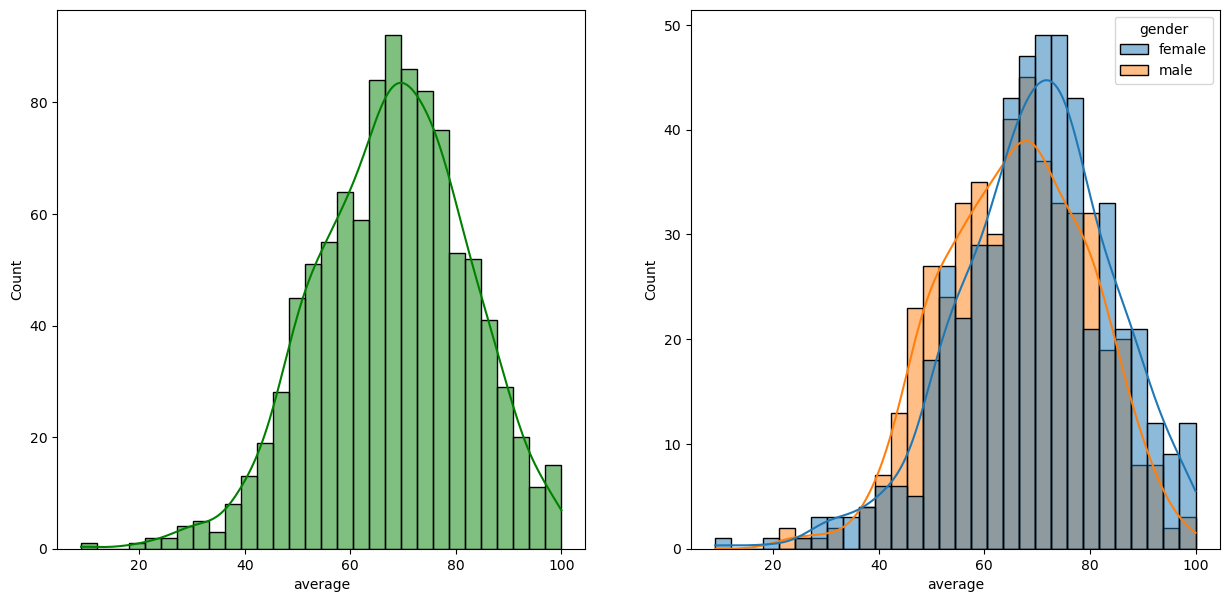

In [70]:
## Explore More Visualization

fig,axis = plt.subplots(1,2,figsize = (15,7))
plt.subplot(121)
sns.histplot( x = 'average' , kde = 'True' , data =df , bins =30 , color = 'g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

## Insights

Female student trend to perform better than male as shown in figure

<AxesSubplot: xlabel='average', ylabel='Count'>

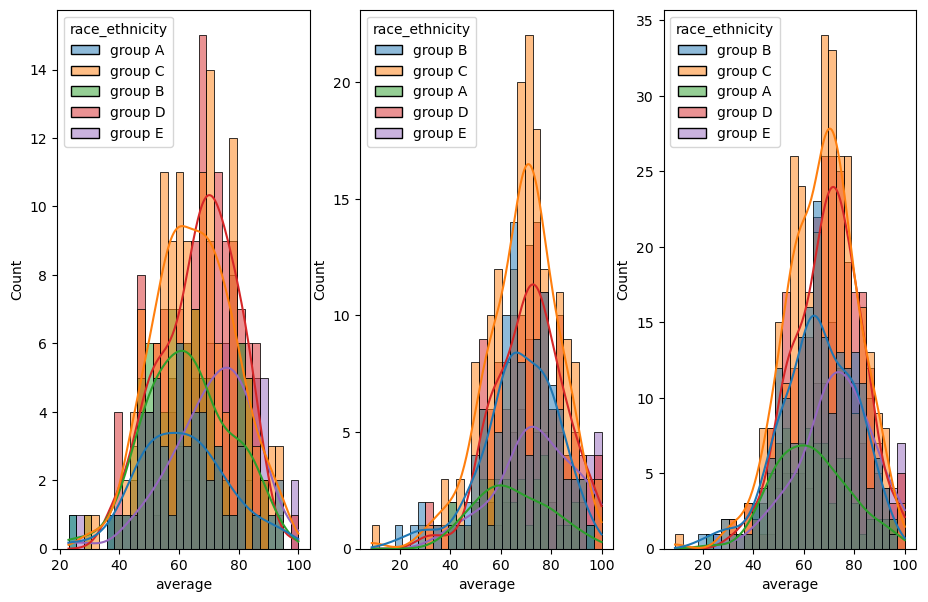

In [79]:
## Explore More Visualization

fig,axis = plt.subplots(1,3,figsize = (15,7))
plt.subplot(141)
sns.histplot( x = 'average' , kde = True , data =df[df.gender=='male'] , bins =30 ,  hue='race_ethnicity')
plt.subplot(142)
sns.histplot( x = 'average' , kde = True , data =df[df.gender=='female'] , bins =30 ,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='race_ethnicity')

Insights    
Students of group A and group B tends to perform poorly in exam.   
Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<AxesSubplot: xlabel='average', ylabel='Count'>

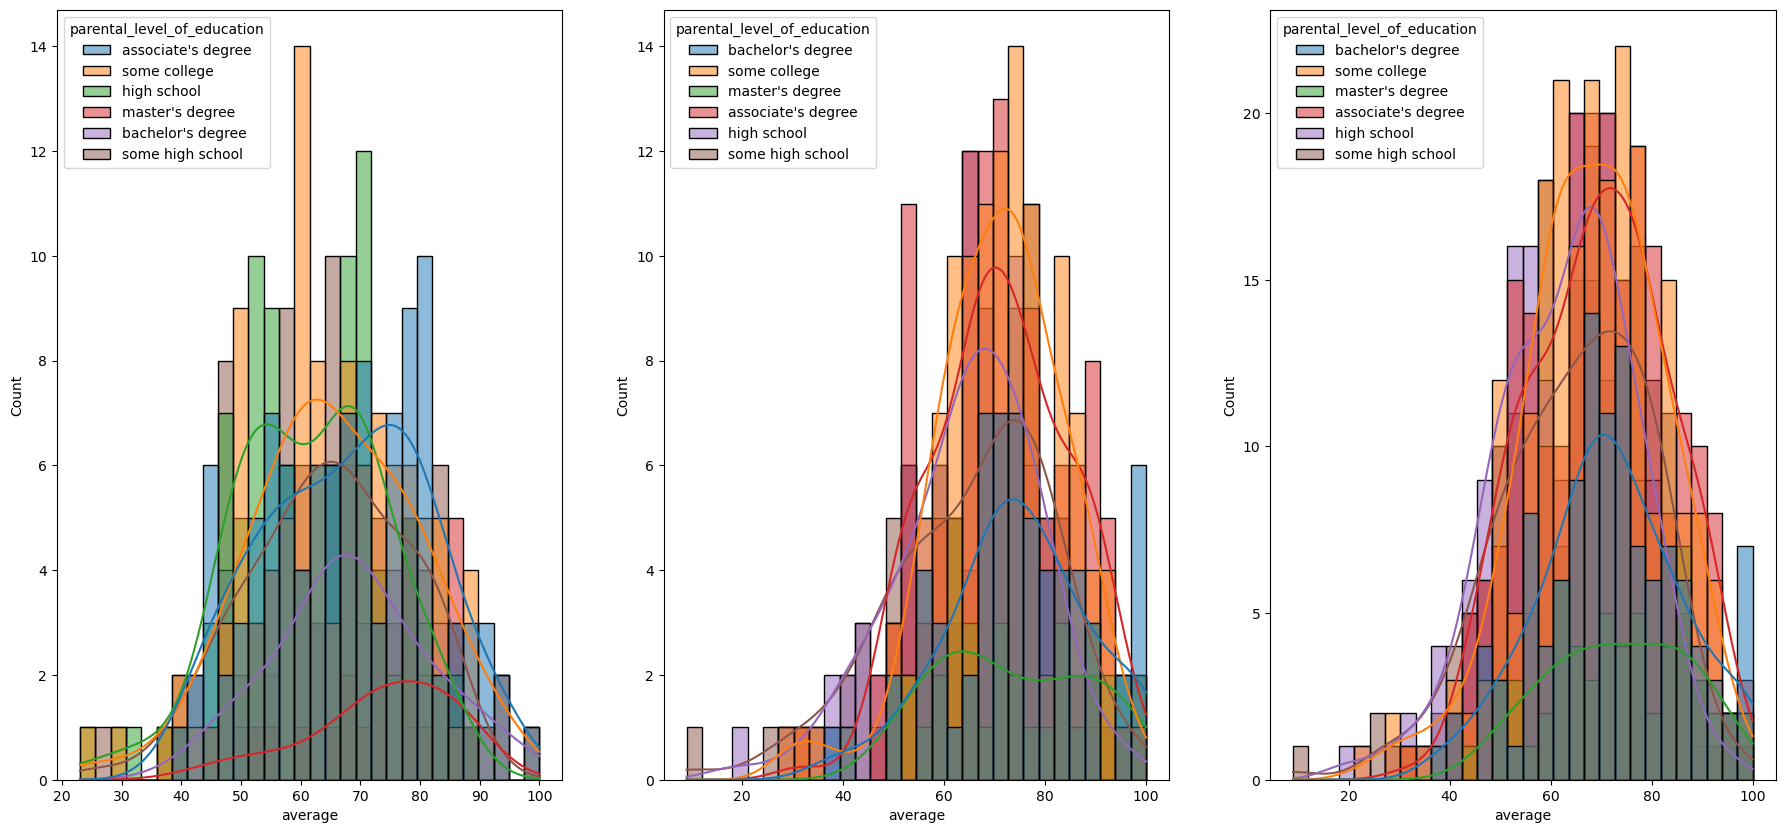

In [84]:
## Explore More Visualization

fig,axis = plt.subplots(1,3,figsize = (30,10))
plt.subplot(141)
sns.histplot( x = 'average' , kde = True , data =df[df.gender=='male'] , bins =30 ,  hue='parental_level_of_education')
plt.subplot(142)
sns.histplot( x = 'average' , kde = True , data =df[df.gender=='female'] , bins =30 ,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental_level_of_education')

Insights      
In general parent's education don't help student perform well in exam.     
3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam   
2nd plot we can see there is no effect of parent's education on female students.    


<AxesSubplot: >

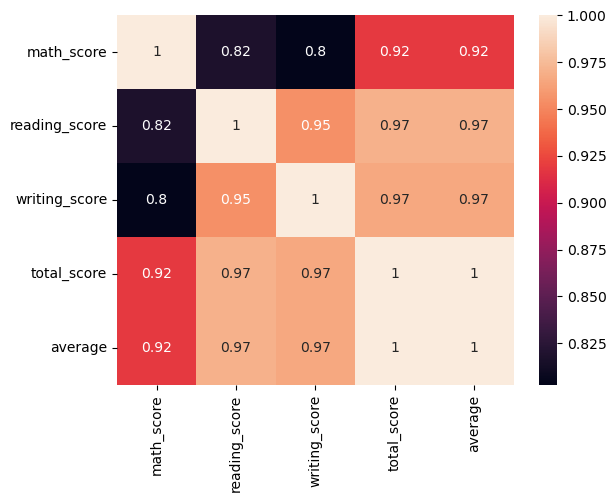

In [85]:
sns.heatmap(df.corr(), annot=True)